In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
#read in train and shape dfs

path_LP_train = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/LP_train.csv'
path_shape = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/shape.csv'
    
shape_df = pd.read_csv(path_shape, index_col=0)
shape_df = pd.DataFrame(data = shape_df)

print(shape_df.shape)

LP_df = pd.read_csv(path_LP_train, index_col=0)
LP_df = pd.DataFrame(data = LP_df)

print(LP_df.shape)

shape_df.head(10)

(4733, 17)
(1454, 21)


,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
0,190620,682,100,choice,0,1,1,0.0,0.0,1.0,1.15,2,0.05,NaN,2.0,1.0,0.0
1,190620,682,100,choice,1,1,1,0.0,0.0,1.0,1.00,1,0.10,10.0,2.0,1.0,0.0
2,190620,682,100,choice,2,1,1,0.0,0.0,1.0,1.48,1,0.06,3.0,2.0,1.0,0.0
3,190620,682,100,choice,3,1,1,0.0,0.0,1.0,0.85,1,0.14,10.0,2.0,1.0,0.0
4,190620,682,100,choice,4,1,1,0.0,0.0,1.0,0.88,1,0.04,0.0,2.0,1.0,0.0
5,190620,682,100,choice,5,1,1,0.0,0.0,1.0,1.10,1,0.13,4.0,2.0,1.0,0.0
6,190620,682,100,choice,6,1,1,0.0,0.0,1.0,1.05,0,0.00,7.0,2.0,1.0,0.0
7,190620,682,100,choice,7,1,1,0.0,0.0,1.0,0.76,1,0.04,2.0,2.0,1.0,0.0
8,190620,682,100,choice,8,1,1,0.0,0.0,1.0,1.07,0,0.00,8.0,2.0,1.0,0.0
9,190620,682,100,choice,9,1,1,0.0,0.0,1.0,1.48,0,0.00,10.0,2.0,1.0,0.0


In [3]:
shape_df.groupby('session').size()

session
100        1474
Shape_1     941
Shape_2     770
Shape_3     710
Shape_4     838
dtype: int64

In [4]:
shape_df.groupby('date')['session'].value_counts()

date    session
190613  Shape_1    397
190614  Shape_1    440
        Shape_2    353
190617  Shape_2    304
        Shape_3    287
        Shape_1    104
190618  Shape_4    361
        Shape_3    320
        Shape_2    113
190619  100        375
        Shape_4    357
        Shape_3    103
190620  100        565
        Shape_4    120
190621  100        534
Name: session, dtype: int64

In [5]:
shape_df_no1 = shape_df[shape_df['session'] != 'Shape_1']

In [6]:
shape_df_no1.groupby('session').mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
session,,,,,,,,,,,,,,,
100,190620.107870,691.073948,11.095658,1.461330,1.362958,0.424695,0.975027,0.537992,1.157775,0.687924,0.244959,5.912333,1.53867,1.46133,0.0
Shape_2,190615.771429,691.355844,9.901299,1.502597,0.929870,0.440260,1.770403,0.489610,1.853338,1.432468,0.681078,23.573487,NaN,NaN,NaN
Shape_3,190617.740845,691.452113,9.336620,1.523944,0.949296,0.419718,1.329056,0.529577,1.579028,1.138028,0.505944,13.922713,NaN,NaN,NaN
Shape_4,190618.712411,691.021480,10.647971,1.519093,0.946301,0.443914,1.142947,0.502387,1.274248,0.915274,0.336957,8.179790,NaN,NaN,NaN


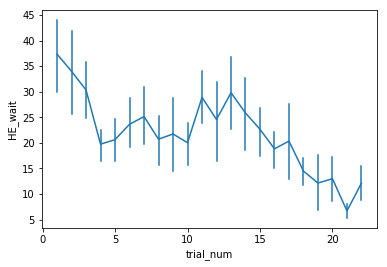

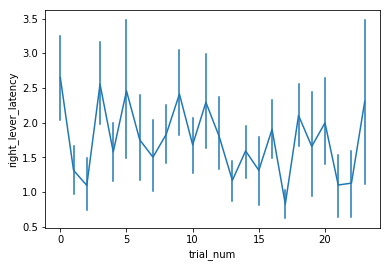

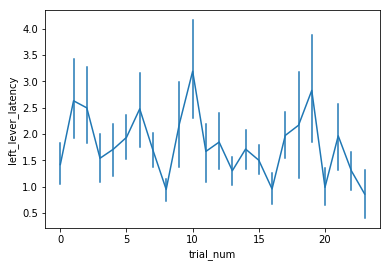

In [7]:
sns.lineplot(x='trial_num', y='HE_wait', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=shape_df_no1[shape_df_no1['session'] == 'Shape_2'], err_style="bars", ci=68)

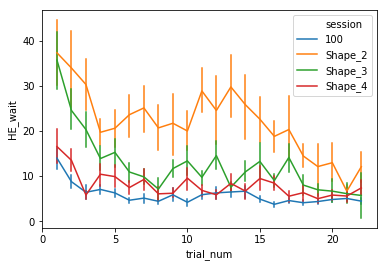

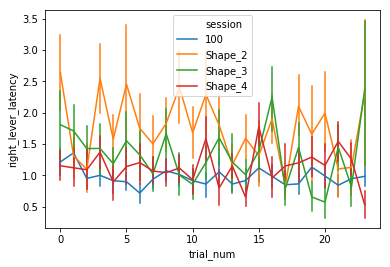

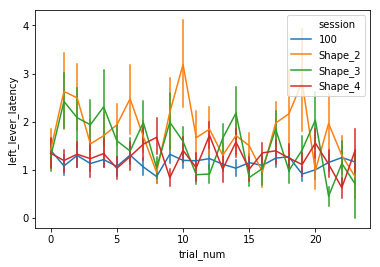

In [8]:
sns.lineplot(x='trial_num', y='HE_wait', data=shape_df_no1, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=shape_df_no1, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=shape_df_no1, hue='session', err_style="bars", ci=68)

In [9]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PD_round1.xlsx'

animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

print(animal_info.shape)

animal_info.head(10)

(19, 4)


,animal,high_reward,cage,group
0,684,2,2,1
1,685,2,2,1
2,686,2,2,1
3,693,1,5,1
4,694,1,5,1
5,695,1,5,1
6,696,2,6,2
7,697,1,6,2
8,698,1,6,2
9,682,1,1,2


In [10]:
#add cage info from animal_info df

animals = animal_info['animal'].values

for animal in animals:
    shape_df_no1.loc[shape_df_no1['animal_number'] == animal, 'cage'] = \
    pd.concat([animal_info[animal_info['animal'] == animal]['cage']]*(len(shape_df_no1[shape_df_no1['animal_number'] == animal])), ignore_index=True).values
    
shape_df_no1.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage
0,190620,682,100,choice,0,1,1,0.0,0.0,1.0,1.15,2,0.05,NaN,2.0,1.0,0.0,1.0
1,190620,682,100,choice,1,1,1,0.0,0.0,1.0,1.00,1,0.10,10.0,2.0,1.0,0.0,1.0
2,190620,682,100,choice,2,1,1,0.0,0.0,1.0,1.48,1,0.06,3.0,2.0,1.0,0.0,1.0
3,190620,682,100,choice,3,1,1,0.0,0.0,1.0,0.85,1,0.14,10.0,2.0,1.0,0.0,1.0
4,190620,682,100,choice,4,1,1,0.0,0.0,1.0,0.88,1,0.04,0.0,2.0,1.0,0.0,1.0


In [11]:
lp_assign_groupby = shape_df_no1[shape_df_no1['session'] != '100'].groupby(['cage', 'animal_number', 'session']).sum()

lp_assign_groupby['lever_bias'] = lp_assign_groupby['right_lever_count'] \
    / (lp_assign_groupby['right_lever_count'] + lp_assign_groupby['left_lever_count'])

lp_assign_groupby['lever_bias'].head()

cage  animal_number  session
1.0   682            Shape_2    0.382353
                     Shape_3    0.205128
                     Shape_4    0.250000
      683            Shape_2    0.771429
                     Shape_3    0.592593
Name: lever_bias, dtype: float64

In [13]:
lp_assign_groupby.reset_index(inplace=True)

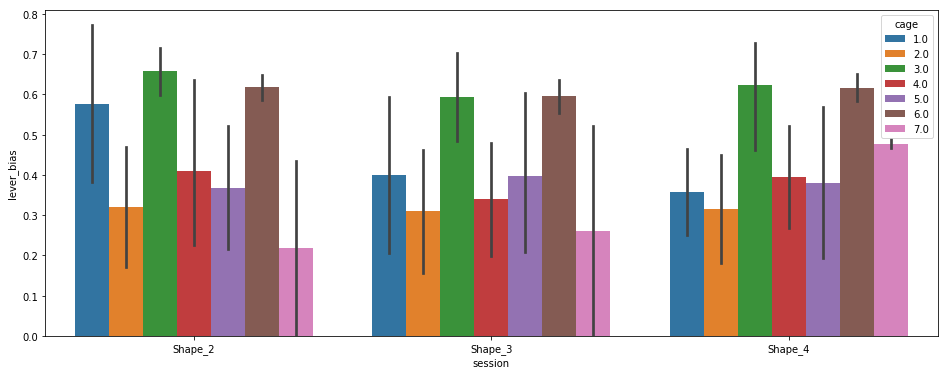

In [14]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='session', y='lever_bias', data=lp_assign_groupby, ci=68, hue='cage')

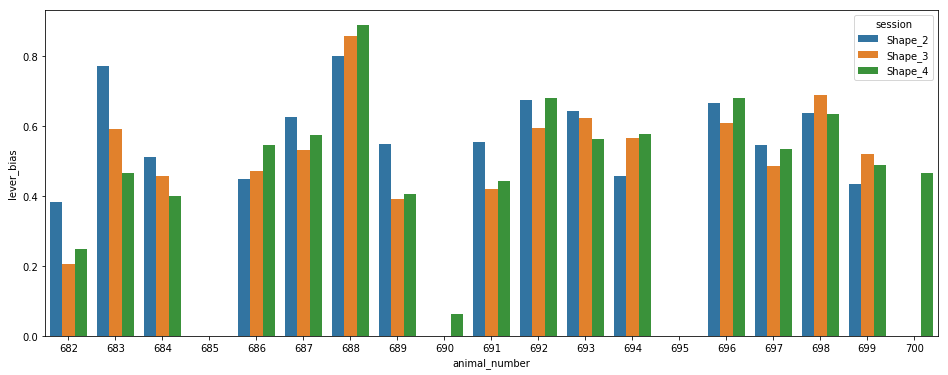

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x='animal_number', y='lever_bias', data=lp_assign_groupby, ci=68, hue='session')

In [16]:
lp_bias_animal = pd.DataFrame(data = lp_assign_groupby.groupby(['cage', 'animal_number'])['lever_bias'].mean())
lp_bias_animal.head()

lever_bias
cage animal_number            
1.0  682              0.279160
     683              0.609712
2.0  684              0.455927
     685              0.000000
     686              0.489226

In [17]:
lp_bias_animal.reset_index(inplace=True)
lp_bias_animal.head()

,cage,animal_number,lever_bias
0,1.0,682,0.279160
1,1.0,683,0.609712
2,2.0,684,0.455927
3,2.0,685,0.000000
4,2.0,686,0.489226


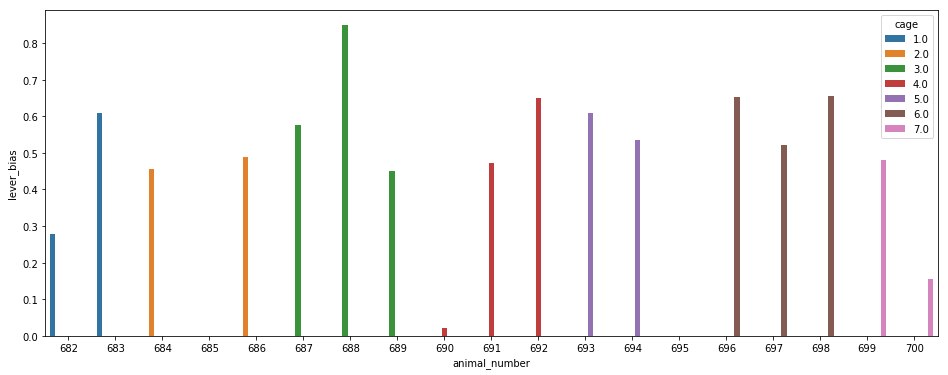

In [18]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='animal_number', y='lever_bias', data=lp_bias_animal, ci=68, hue='cage')

In [19]:
animals = shape_df_no1['animal_number'].unique()

for animal in animals:
    shape_df_no1.loc[shape_df_no1['animal_number'] == animal, 'lever_bias'] = \
    pd.concat([pd.DataFrame(data = lp_bias_animal[lp_bias_animal['animal_number'] == animal]['lever_bias'].values)]*(len(shape_df_no1[shape_df_no1['animal_number'] == animal])), ignore_index=True).values
    
shape_df_no1.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias
0,190620,682,100,choice,0,1,1,0.0,0.0,1.0,1.15,2,0.05,NaN,2.0,1.0,0.0,1.0,0.27916
1,190620,682,100,choice,1,1,1,0.0,0.0,1.0,1.00,1,0.10,10.0,2.0,1.0,0.0,1.0,0.27916
2,190620,682,100,choice,2,1,1,0.0,0.0,1.0,1.48,1,0.06,3.0,2.0,1.0,0.0,1.0,0.27916
3,190620,682,100,choice,3,1,1,0.0,0.0,1.0,0.85,1,0.14,10.0,2.0,1.0,0.0,1.0,0.27916
4,190620,682,100,choice,4,1,1,0.0,0.0,1.0,0.88,1,0.04,0.0,2.0,1.0,0.0,1.0,0.27916


In [20]:
#split off 100 to split and assign sham and blast cages 
shape_100 = shape_df_no1[(shape_df_no1['session'] == '100')]

shape_last_100 = pd.DataFrame()
animals = animal_info['animal'].values

for animal in animals:
    animal_data = shape_100[shape_100['animal_number']== animal]
    
    animal_dates = animal_data['date'].unique()
    
    animal_last_100 = animal_data[animal_data['date'] == animal_dates[-1]]
    
    shape_last_100 = shape_last_100.append(animal_last_100)

print(shape_last_100.shape)
print(len(shape_last_100['animal_number'].unique()))

(860, 19)
19


In [21]:
shape_last_100.groupby('cage').mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,lever_bias
cage,,,,,,,,,,,,,,,,
1.0,190621.000000,682.494624,11.139785,1.000000,1.258065,0.258065,0.778602,0.741935,1.135806,0.655914,0.279247,3.752941,2.000000,1.000000,0.0,0.442659
2.0,190619.330882,685.036765,10.919118,2.000000,1.602941,0.235294,0.638824,0.683824,1.284779,0.897059,0.354044,7.750000,1.000000,2.000000,0.0,0.316821
3.0,190621.000000,687.918699,10.016260,1.650407,1.341463,0.487805,0.898537,0.512195,1.399106,0.577236,0.191220,9.477477,1.349593,1.650407,0.0,0.646544
4.0,190620.299270,691.051095,11.065693,2.000000,1.547445,0.350365,0.905912,0.598540,1.744380,0.613139,0.373504,6.968000,1.000000,2.000000,0.0,0.399898
5.0,190620.671329,694.006993,11.419580,1.000000,1.216783,0.307692,0.740629,0.601399,1.077832,0.755245,0.297762,3.519084,2.000000,1.000000,0.0,0.379831
6.0,190620.000000,696.993007,11.419580,1.335664,1.496503,0.664336,1.434266,0.328671,1.129021,0.538462,0.147622,4.656489,1.664336,1.335664,0.0,0.609421
7.0,190621.000000,699.494118,10.235294,1.505882,1.400000,0.505882,1.262118,0.494118,1.028706,0.541176,0.116706,9.402597,1.494118,1.505882,0.0,0.320599


In [22]:
animals = animal_info['animal'].values

for animal in animals:
    shape_last_100.loc[shape_last_100['animal_number'] == animal, 'group'] = \
    pd.concat([animal_info[animal_info['animal'] == animal]['group']]*(len(shape_last_100[shape_last_100['animal_number'] == animal])), ignore_index=True).values
    
shape_last_100.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias,group
117,190619,684,100,choice,0,2,2,0.0,0.0,1.0,1.95,0,0.0,NaN,1.0,2.0,0.0,2.0,0.455927,1.0
118,190619,684,100,choice,1,2,2,0.0,0.0,1.0,1.20,0,0.0,25.0,1.0,2.0,0.0,2.0,0.455927,1.0
119,190619,684,100,choice,2,2,2,0.0,0.0,1.0,2.43,0,0.0,33.0,1.0,2.0,0.0,2.0,0.455927,1.0
120,190619,684,100,choice,3,2,2,0.0,0.0,1.0,2.44,0,0.0,2.0,1.0,2.0,0.0,2.0,0.455927,1.0
121,190619,684,100,choice,4,2,2,0.0,0.0,1.0,1.66,0,0.0,20.0,1.0,2.0,0.0,2.0,0.455927,1.0


In [23]:
shape_last_100.groupby(['group']).mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,cage,lever_bias
group,,,,,,,,,,,,,,,,,
1.0,190620.318408,689.109453,10.820896,1.537313,1.385572,0.338308,0.754502,0.601990,1.246144,0.748756,0.284204,6.759563,1.462687,1.537313,0.0,3.373134,0.440120
2.0,190620.478166,692.735808,11.037118,1.497817,1.445415,0.458515,1.111135,0.524017,1.295852,0.585153,0.236179,6.038278,1.502183,1.497817,0.0,4.572052,0.459283


In [55]:
pd_df_session.sort_values('animal_number')

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave
0,190621,1.0,682,2.0,100,choice,right,24,0.0,0.000000,24.0,0.996667
0,190621,1.0,682,2.0,100,force,right,34,11.0,1.480870,12.0,0.499130
0,190621,1.0,683,2.0,100,force,right,33,11.0,1.457273,11.0,1.111818
0,190621,1.0,683,2.0,100,choice,right,26,2.0,0.262083,22.0,1.907083
0,190619,2.0,684,1.0,100,choice,left,38,19.0,1.635263,0.0,0.000000
0,190619,2.0,684,1.0,100,force,left,36,12.0,0.817083,12.0,1.136667
0,190620,2.0,685,1.0,100,choice,left,48,24.0,1.680000,0.0,0.000000
0,190620,2.0,685,1.0,100,force,left,20,10.0,0.644762,0.0,0.000000
0,190619,2.0,686,1.0,100,choice,left,40,16.0,1.560000,8.0,0.980417
0,190619,2.0,686,1.0,100,force,left,36,12.0,1.364583,12.0,1.502917


In [61]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = animal_info['animal'].values

for animal in animals:
    
    #get animal data
    animal_data = shape_last_100[shape_last_100['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['cage'] = animal_data_sub_session['cage'].unique()
            pd_df_session_int['animal_number'] = animal_data_sub_session['animal_number'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['session'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave,high_reward_prob
0,190619,2.0,684,1.0,100,choice,left,38,19.0,1.635263,0.0,0.000000,100.000000
1,190619,2.0,684,1.0,100,force,left,36,12.0,0.817083,12.0,1.136667,50.000000
2,190620,2.0,685,1.0,100,choice,left,48,24.0,1.680000,0.0,0.000000,100.000000
3,190620,2.0,685,1.0,100,force,left,20,10.0,0.644762,0.0,0.000000,100.000000
4,190619,2.0,686,1.0,100,choice,left,40,16.0,1.560000,8.0,0.980417,66.666667


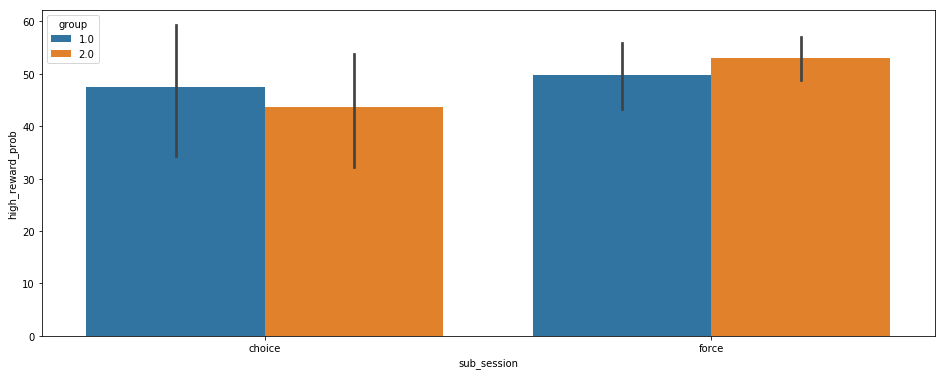

In [65]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='sub_session', y='high_reward_prob', data=pd_df_session, ci=68, hue='group')

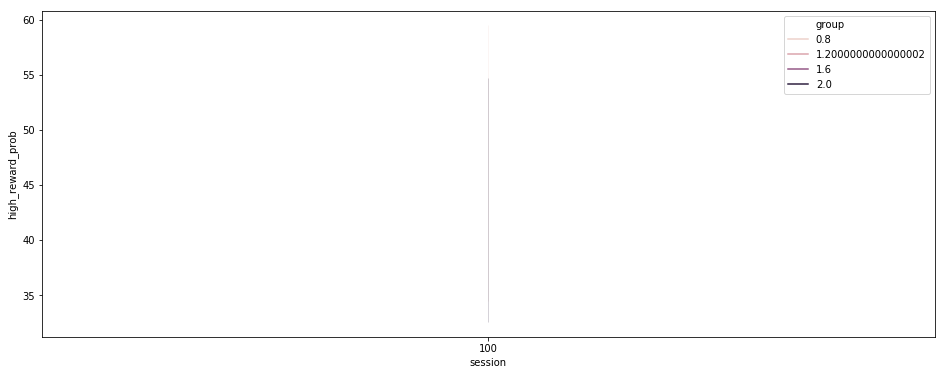

In [68]:
plt.figure(figsize=(16, 6))
g = sns.lineplot(x='session', y='high_reward_prob', data=pd_df_session[pd_df_session['sub_session'] == 'choice'], ci=68, hue='group')